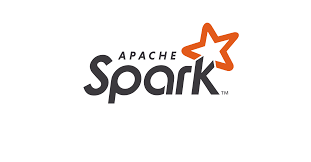

# Spark DataFrames and SparkSQL

# Install pyspark

In [1]:
# Installing required packages
!pip install pyspark
!pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 38 kB/s 
     |████████████████████████████████| 199 kB 47.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=464d1dbe142a26fa1f4ddec02c3e0f1064d6d8ebecb9e08506027b72e98032cb
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Exercise 1 -  Spark Context and Spark Session


In this exercise, you will create the Spark Context and initialize the Spark session needed for SparkSQL and DataFrames.
SparkContext is the entry point for Spark applications and contains functions to create RDDs such as `parallelize()`. SparkSession is needed for SparkSQL and DataFrame operations.


#### Task 1: Creating the spark session and context


In [2]:
import findspark
findspark.init()

# PySpark is the Spark API for Python. In this lab, we use PySpark to initialize the spark context. 
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

# Creating a spark context class
sc = SparkContext()

# Creating a spark session
spark = SparkSession \
    .builder \
    .appName("Python Spark DataFrames example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

## Exercise 3: DataFrames and SparkSQL


In order to work with the extremely powerful SQL engine in Apache Spark, you will need a Spark Session. We have created that in the first Exercise, let us verify that spark session is still active.


#### Task 1: Create a DataFrame!


You can create a structured data set (much like a database table) in Spark.  Once you have done that, you can then use powerful SQL tools to query and join your dataframes.


In [3]:
!curl https://raw.githubusercontent.com/PacktPublishing/Jupyter-for-Data-Science/master/Chapter04/files/people.json >> people.json

# Read the dataset into a spark dataframe using the `read.json()` function
df = spark.read.json("people.json").cache()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   227  100   227    0     0    395      0 --:--:-- --:--:-- --:--:--   395


In [4]:
# Print the dataframe as well as the data schema
df.show()
df.printSchema()

+----+----+--------------------+---------------+
| age|born|                fame|           name|
+----+----+--------------------+---------------+
|null|null|                null|        Michael|
|  30|null|                null|           Andy|
|  19|null|                null|         Justin|
|null|1955|co-founder of App...|     Steve Jobs|
|null|1955|                null|Tim Berners-Lee|
|null|1815|                null|   George Boole|
+----+----+--------------------+---------------+

root
 |-- age: long (nullable = true)
 |-- born: long (nullable = true)
 |-- fame: string (nullable = true)
 |-- name: string (nullable = true)



In [5]:
# Register the DataFrame as a SQL temporary view
df.createTempView("people")

#### Task 2: Explore the data using DataFrame functions and SparkSQL

In this section, we explore the datasets using functions both from dataframes as well as corresponding SQL queries using sparksql. Note the different ways to achieve the same task!


In [6]:
# Select and show basic data columns

df.select("name").show()
df.select(df["name"]).show()
spark.sql("SELECT name FROM people").show()

+---------------+
|           name|
+---------------+
|        Michael|
|           Andy|
|         Justin|
|     Steve Jobs|
|Tim Berners-Lee|
|   George Boole|
+---------------+

+---------------+
|           name|
+---------------+
|        Michael|
|           Andy|
|         Justin|
|     Steve Jobs|
|Tim Berners-Lee|
|   George Boole|
+---------------+

+---------------+
|           name|
+---------------+
|        Michael|
|           Andy|
|         Justin|
|     Steve Jobs|
|Tim Berners-Lee|
|   George Boole|
+---------------+



In [7]:
# Perform basic filtering

df.filter(df["age"] > 21).show()
spark.sql("SELECT age, name FROM people WHERE age > 21").show()

+---+----+----+----+
|age|born|fame|name|
+---+----+----+----+
| 30|null|null|Andy|
+---+----+----+----+

+---+----+
|age|name|
+---+----+
| 30|Andy|
+---+----+



In [8]:
# Perfom basic aggregation of data

df.groupBy("age").count().show()
spark.sql("SELECT age, COUNT(age) as count FROM people GROUP BY age").show()

+----+-----+
| age|count|
+----+-----+
|  19|    1|
|null|    4|
|  30|    1|
+----+-----+

+----+-----+
| age|count|
+----+-----+
|  19|    1|
|null|    0|
|  30|    1|
+----+-----+



***


### Question 1 - RDDs


Create an RDD with integers from 1-50. Apply a transformation to multiply every number by 2, resulting in an RDD that contains the first 50 even numbers.


In [ ]:
# starter code
# numbers = range(1, 50)
# numbers_RDD = ...
# even_numbers_RDD = numbers_RDD.map(lambda x: ..)

In [ ]:
# Code block for learners to answer

### Question 2 - DataFrames and SparkSQL


Similar to the `people.json` file, now read the `people2.json` file into the notebook, load it into a dataframe and apply SQL operations to determine the average age in our people2 file.


In [ ]:
# starter code
# !curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0225EN-SkillsNetwork/labs/people2.json >> people2.json
# df = spark.read...
# df.createTempView..
# spark.sql("SELECT ...")

In [ ]:
# Code block for learners to answer

Double-click **here** for a hint.

<!-- The hint is below:

1. The SQL query "Select AVG(column_name) from.." can be used to find the average value of a column. 
2. Another possible way is to use the dataframe operations select() and mean()
-->


Double-click **here** for the solution.

<!-- The answer is below:
df = spark.read('people2.json')
df.createTempView("people2")
spark.sql("SELECT AVG(age) from people2")
-->


### Question 3 - SparkSession


Close the SparkSession we created for this notebook


In [ ]:
# Code block for learners to answer

Double-click **here** for the solution.

<!-- The answer is below:

spark.stop() will stop the spark session

-->
